In [1]:
# import libarary
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import file
Coffe = pd.read_excel('C:/Users/LENOVO/Documents/Data Science/Data Percobaan 2/Coffe/Coffee Shop Sales.xlsx')

In [3]:
Coffe.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
Coffe['product_type'].value_counts()

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

In [5]:
# Cek data Type
Coffe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
# Cek Missing Value
Coffe.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
# New Columns For Month
Coffe['Month'] = Coffe['transaction_date'].dt.month

In [8]:
Coffe['Day'] = Coffe['transaction_date'].dt.day

In [9]:
# New Colum for Total Sales
Coffe['Total_Sales'] = Coffe['transaction_qty'] * Coffe['unit_price']

In [10]:
Coffe.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'Month', 'Day', 'Total_Sales'],
      dtype='object')

In [11]:
Transaction_Sales_Day = Coffe.groupby('Day')['transaction_qty'].max().reset_index()

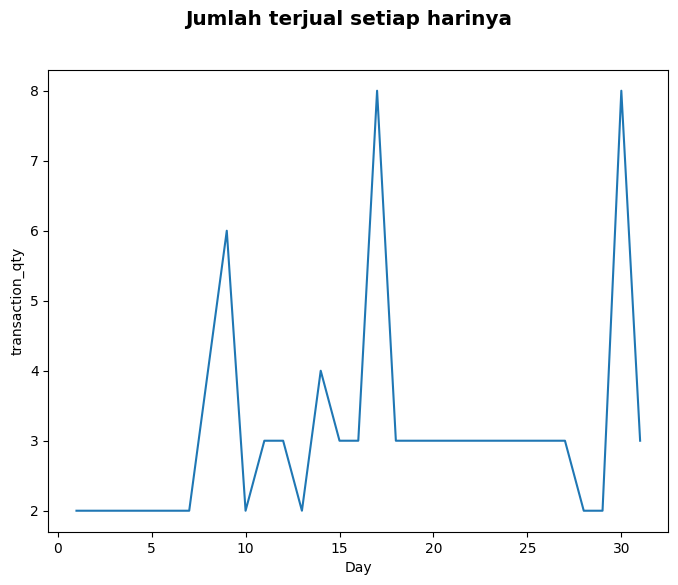

In [22]:
# Trend Sale By Month
plt.figure(figsize=(8,6))
sns.lineplot(data=Transaction_Sales_Day , x='Day', y='transaction_qty') 
plt.suptitle('Jumlah terjual setiap harinya', fontweight= 'bold', size='x-large')
plt.xlabel('Day')
plt.ylabel('transaction_qty')
plt.show()

In [13]:
Transaction_Sales = Coffe.groupby('Month')['transaction_qty'].max().reset_index()

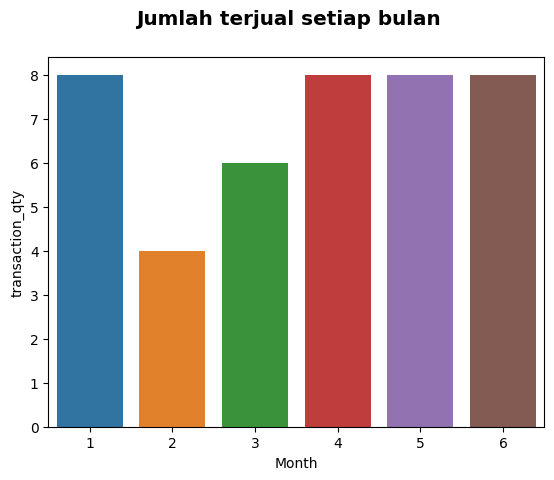

In [26]:
sns.barplot(data=Transaction_Sales, x='Month', y='transaction_qty') 
plt.suptitle('Jumlah terjual setiap bulan', fontweight= 'bold', size='x-large') 
plt.xlabel('Month')
plt.ylabel('transaction_qty')
plt.show()

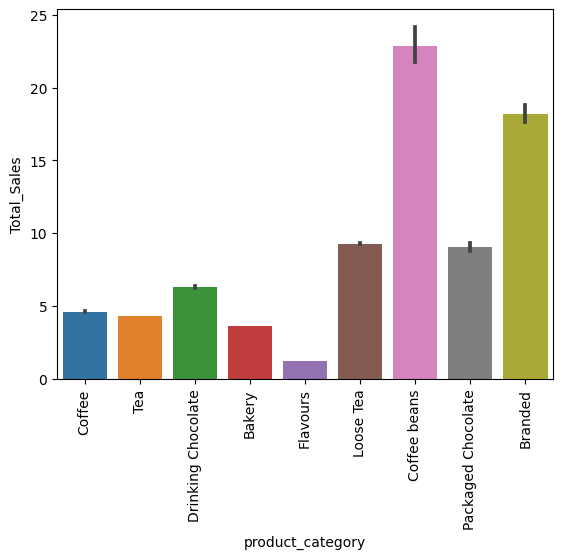

In [15]:
#Visualisation by Category
sns.barplot(data=Coffe, x='product_category', y='Total_Sales')
plt.xticks(rotation=90)
plt.show()

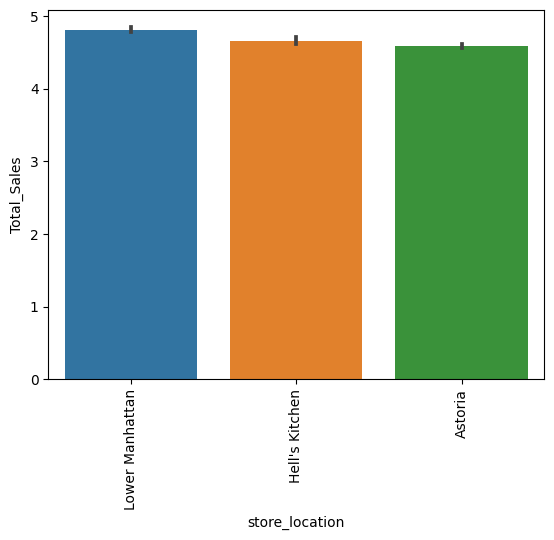

In [16]:
sns.barplot(data=Coffe, x='store_location', y='Total_Sales')
plt.xticks(rotation=90)
plt.show()

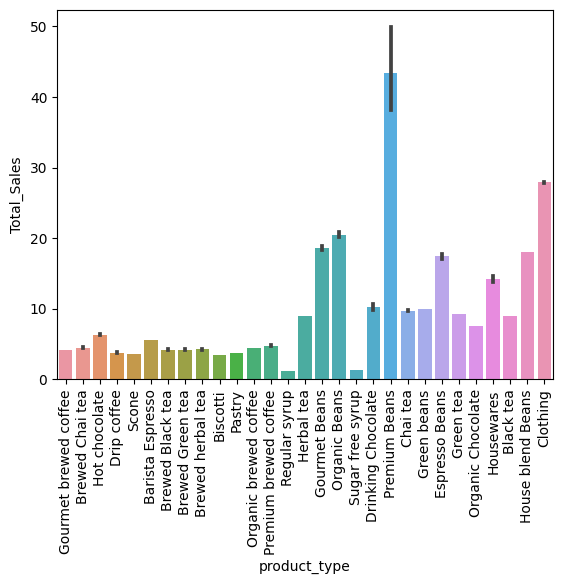

In [17]:
sns.barplot(data=Coffe, x='product_type', y='Total_Sales')
plt.xticks(rotation=90)
plt.show()

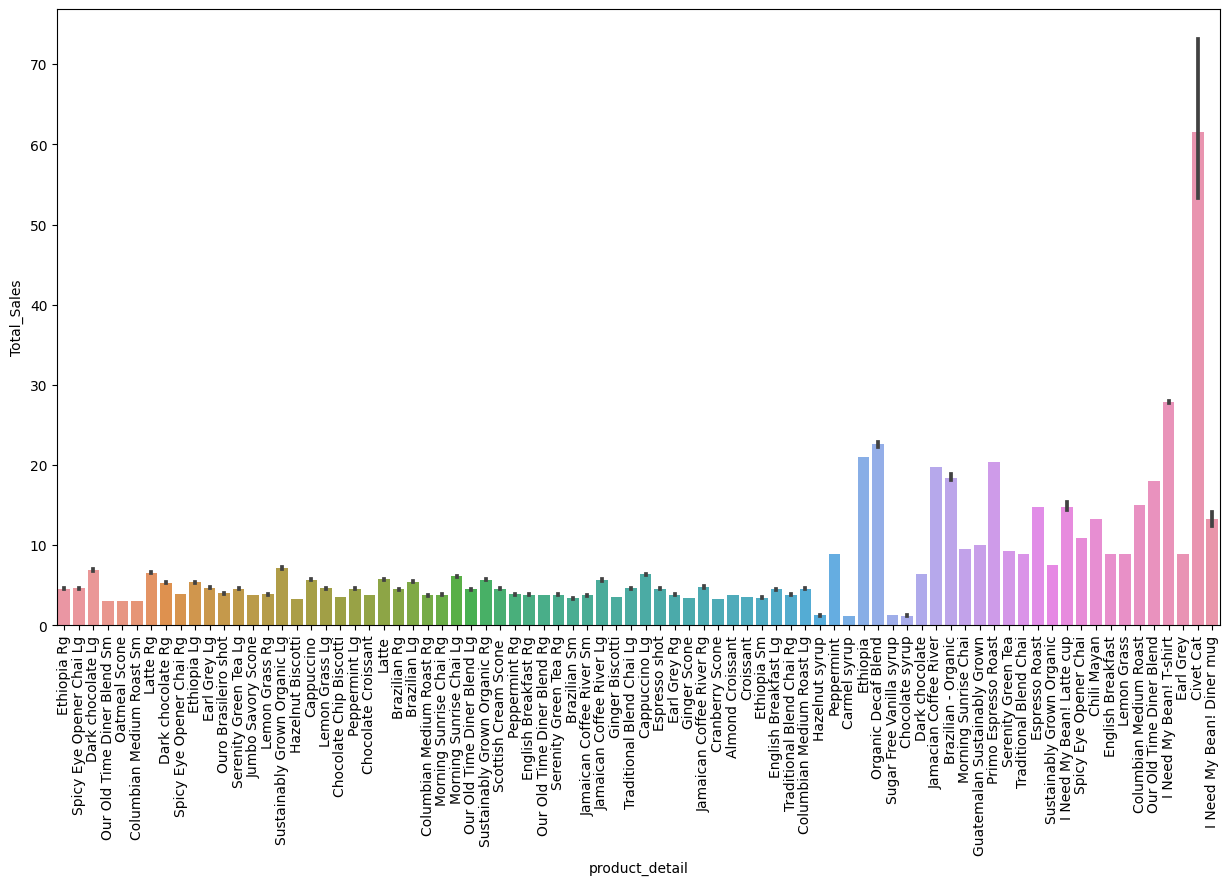

In [18]:
# Visualisation Product
plt.figure(figsize=(15,8))
sns.barplot(data=Coffe, x='product_detail', y='Total_Sales')
plt.xticks(rotation=90)
plt.show()

In [19]:
Coffe.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Day,Total_Sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,6.2


<Axes: title={'center': 'Store'}, xlabel='store_location', ylabel='count'>

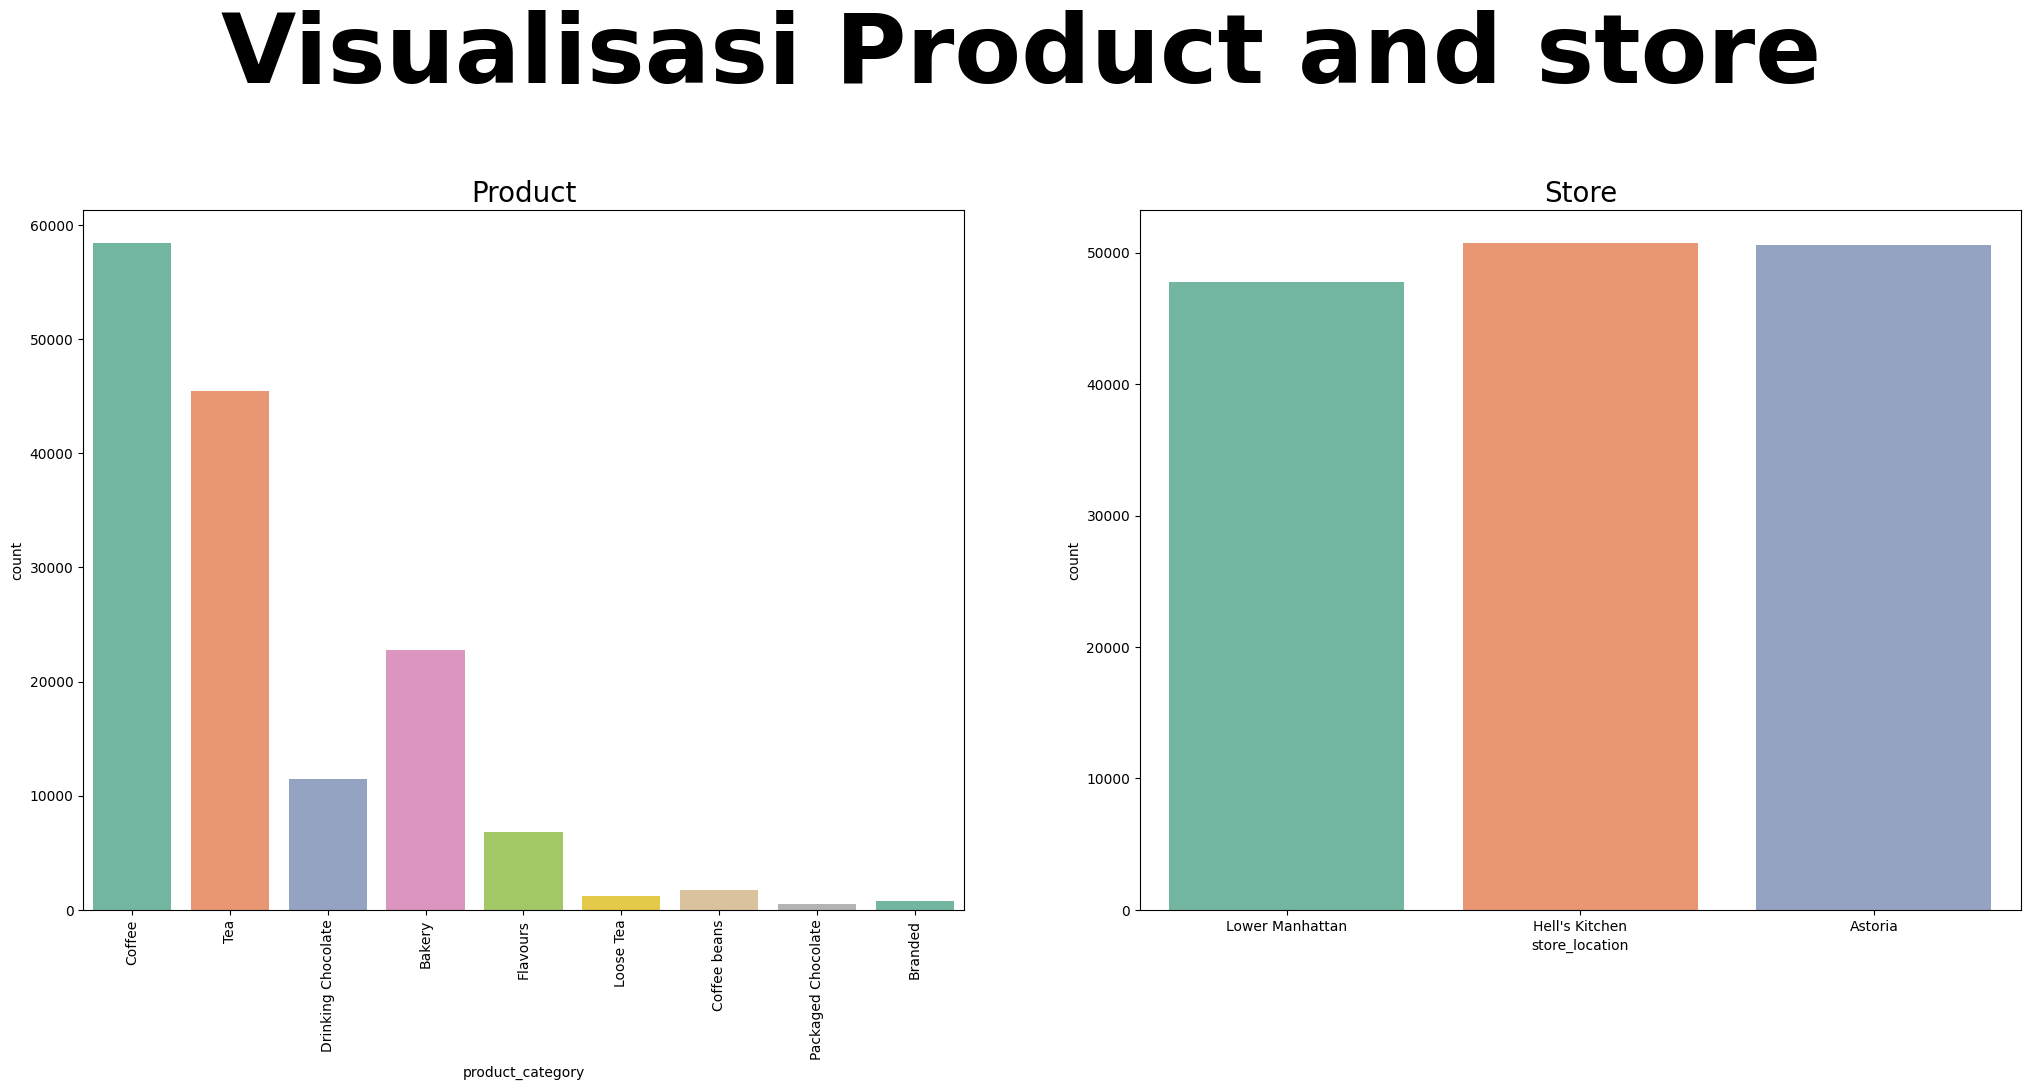

In [20]:
# Visualisasi product & Store 
plt.figure(figsize=(25,20))
plt.suptitle('Visualisasi Product and store', fontweight='bold', fontsize=70)

plt.subplot(2,2,1)
plt.gca().set_title('Product', fontsize=20)
sns.countplot(data=Coffe, x='product_category', palette='Set2')
plt.xticks(rotation=90)

plt.subplot(2,2,2) 
plt.gca().set_title('Store',fontsize=20)
sns.countplot(data=Coffe, x='store_location',palette='Set2')

<Axes: >

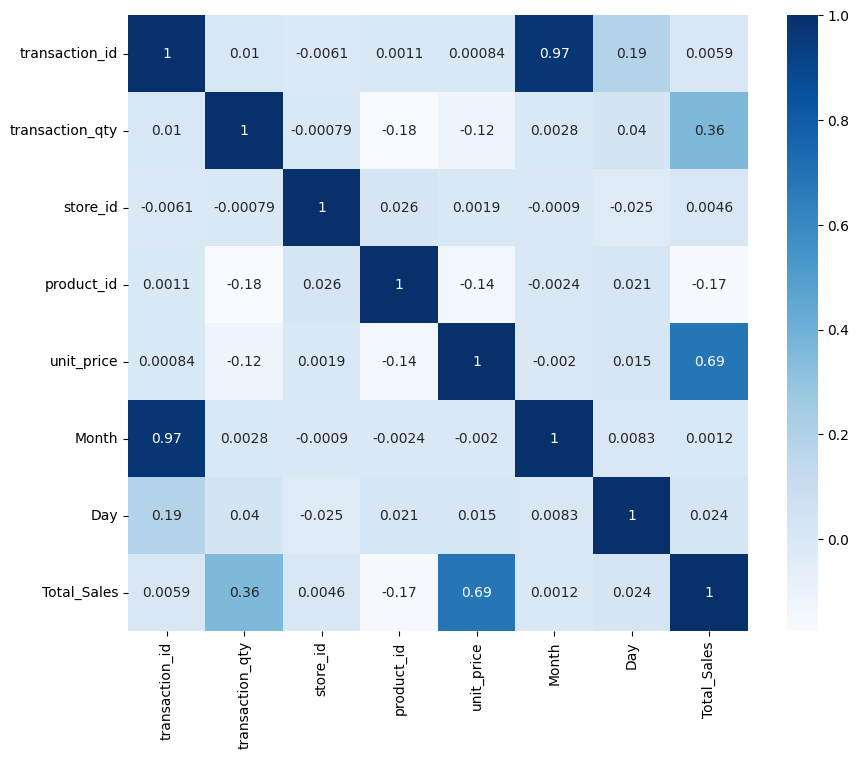

In [28]:
#Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data=Coffe.corr(numeric_only=True), cmap='Blues', annot=True)